<a href="https://colab.research.google.com/github/wiaderwek/AMHE/blob/master/notebooks/amhe_plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AMHE - wykresy


In [54]:
! git clone https://github.com/wiaderwek/AMHE.git

fatal: destination path 'AMHE' already exists and is not an empty directory.


## Prepare data

In [55]:
import numpy as np
import pandas as pd
from datetime import datetime

In [56]:
df_25 = pd.read_csv('/content/AMHE/results/get_25_d_2_results.csv', sep=',',header=None)
df_50 = pd.read_csv('/content/AMHE/results/gen_50_d_2_result.csv', sep=',',header=None)
df_75 = pd.read_csv('/content/AMHE/results/gen_75_d_2_result.csv', sep=',',header=None)
df_100 = pd.read_csv('/content/AMHE/results/gen_100_d_2_result.csv', sep=',',header=None)
df_125 = pd.read_csv('/content/AMHE/results/gen_125_d_2_result.csv', sep=',',header=None)
df_150 = pd.read_csv('/content/AMHE/results/gen_150_d_2_result.csv', sep=',',header=None)

In [57]:
df_25[7] = df_25[7].str.strip()
df_25[8] = df_25[8].str.strip()
df_50[7] = df_50[7].str.strip()
df_50[8] = df_50[8].str.strip()
df_75[7] = df_75[7].str.strip()
df_75[8] = df_75[8].str.strip()
df_100[7] = df_100[7].str.strip()
df_100[8] = df_100[8].str.strip()
df_125[7] = df_125[7].str.strip()
df_125[8] = df_125[8].str.strip()
df_150[7] = df_150[7].str.strip()
df_150[8] = df_150[8].str.strip()

In [58]:
df_25_true = df_25[(df_25[7] == 'True') & (df_25[8] == 'True')]
df_50_true  = df_50[(df_25[7] == 'True') & (df_50[8] == 'True')]
df_75_true  = df_75[(df_25[7] == 'True') & (df_75[8] == 'True')]
df_100_true  = df_100[(df_25[7] == 'True') & (df_100[8] == 'True')]
df_125_true  = df_125[(df_25[7] == 'True') & (df_125[8] == 'True')]
df_150_true  = df_150[(df_25[7] == 'True') & (df_150[8] == 'True')]
df_25_true 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,2021-06-16 09:01:58.091556,N15,N7,83.512177,101,100,-3.359942,True,True,10000,100,10000,1000,95,10,30,50,50,0.4,3,100,10,500,1000,1000,25
1,2021-06-16 09:03:21.649611,N29,N7,88.150947,102,100,-1.215948,True,True,10000,100,10000,1000,95,10,30,50,50,0.4,3,100,10,500,1000,1000,25
2,2021-06-16 09:04:49.850397,N28,N8,89.968523,101,100,-1.124646,True,True,10000,100,10000,1000,95,10,30,50,50,0.4,3,100,10,500,1000,1000,25
3,2021-06-16 09:06:19.849865,N26,N18,82.011816,101,100,0.405817,True,True,10000,100,10000,1000,95,10,30,50,50,0.4,3,100,10,500,1000,1000,25
4,2021-06-16 09:07:41.916560,N21,N8,90.125133,103,100,2.790222,True,True,10000,100,10000,1000,95,10,30,50,50,0.4,3,100,10,500,1000,1000,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,2021-06-16 20:34:12.770272,N5,N20,86.608442,101,100,-3.089568,True,True,10000,100,10000,1000,95,10,30,50,50,0.4,3,100,10,500,1000,1000,25
393,2021-06-16 20:35:39.430677,N28,N4,83.261364,100,100,-3.089568,True,True,10000,100,10000,1000,95,10,30,50,50,0.4,3,100,10,500,1000,1000,25
394,2021-06-16 20:37:02.744182,N13,N4,84.878762,101,100,-3.089568,True,True,10000,100,10000,1000,95,10,30,50,50,0.4,3,100,10,500,1000,1000,25
396,2021-06-16 20:48:06.870886,N23,N25,279.051775,358,100,7.249281,True,True,10000,100,10000,1000,95,10,30,50,50,0.4,3,100,10,500,1000,1000,25


## Plots

In [69]:
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from matplotlib.ticker import PercentFormatter

plt.rcParams.update({'font.size': 22})

### Mean time for correct paths

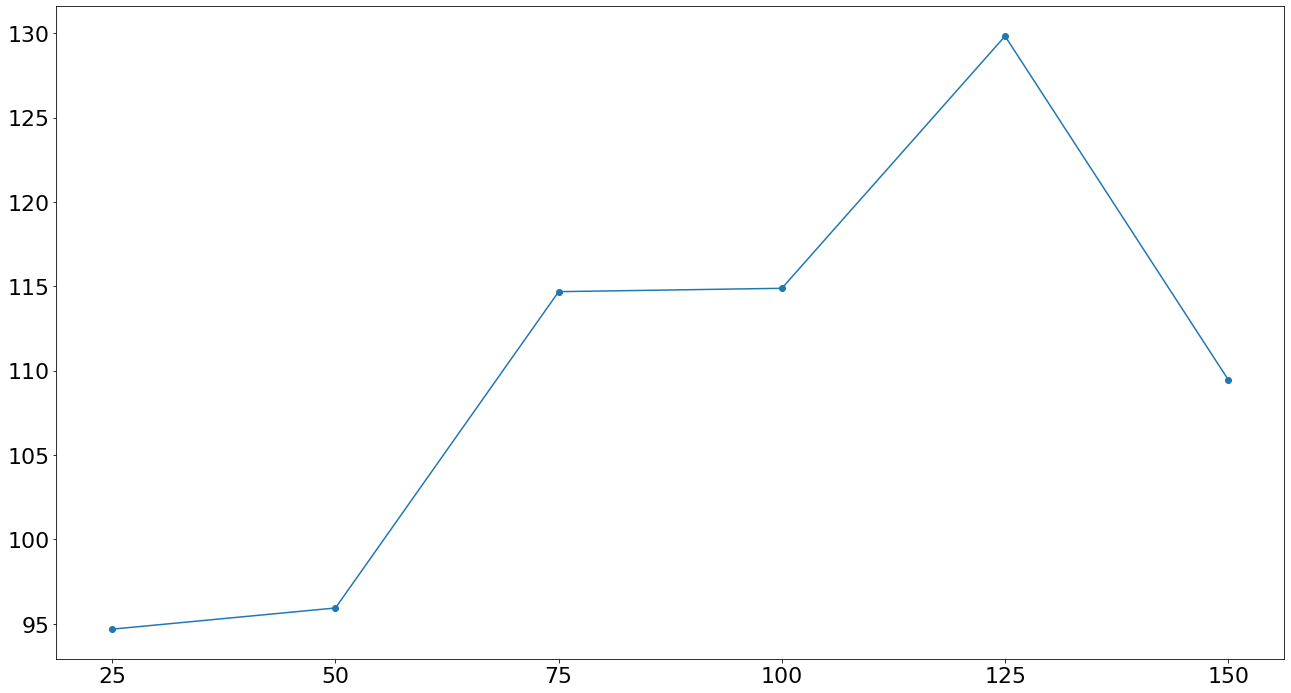

In [60]:
x =np.array([25, 50, 75, 100, 125, 150])
y =np.array([df_25_true[3].mean(), df_50_true[3].mean(), df_75_true[3].mean(), df_100_true[3].mean(), df_125_true[3].mean(), df_150_true[3].mean()])

fig = plt.figure(figsize =(22, 12))
plt.plot(x, y, '-o')
plt.xticks(x)
plt.show()

### Relation between number of correct to all paths 

In [64]:
df_25_true.shape[0]

251

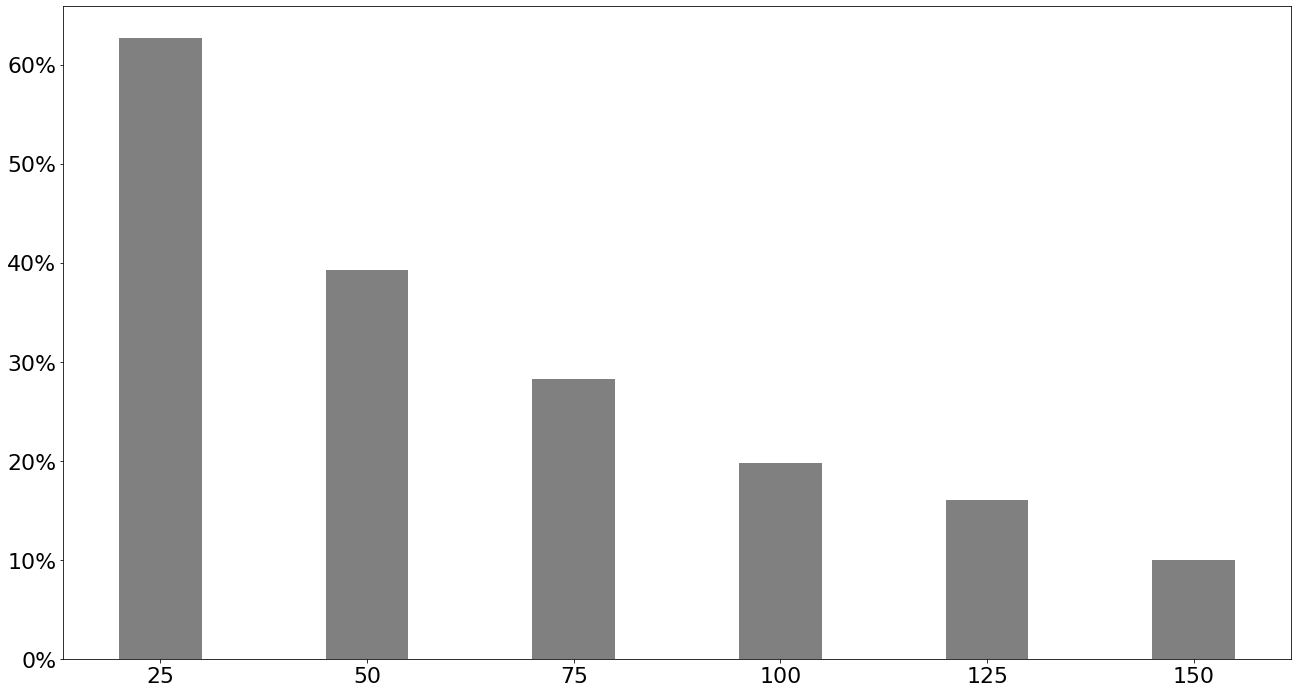

In [70]:
data = {
    '25': (df_25_true.shape[0] / df_25.shape[0]) * 100,
    '50': (df_50_true.shape[0] / df_50.shape[0]) * 100,
    '75': (df_75_true.shape[0] / df_75.shape[0]) * 100,
    '100': (df_100_true.shape[0] / df_100.shape[0]) * 100,
    '125': (df_125_true.shape[0] / df_125.shape[0]) * 100,
    '150': (df_150_true.shape[0] / df_150.shape[0]) * 100,
}

fig = plt.figure(figsize =(22, 12))

ax = plt.subplot()

ax.bar(data.keys(), data.values(), color ='gray',
        width = 0.4)

ax.yaxis.set_major_formatter(PercentFormatter())
# plt.xlabel("Liczba przydzielonych adresów vIP na jednego hosta")
# plt.ylabel("Liczba unikalnych adresów vIP")
# plt.title("Liczba unikalnych adresów vIP w zależności od zakresu przydzielonych adresów vIP")
# plt.show()